HIPOTESIS EDA:

EN ESTE EDA SE QUIERE DEMOSTRAR QUE LAS POLITICAS DE IZQUIERDAS Y GLOBALISTAS, COMO LAS POLITICAS DE LA UNION EUROPEA, QUE SE REFLEJAN EN INDICADORES, QUE SON CONSECUENCIA DE LA EMISION DESENFRENADA DE DEUDA Y EL AUMENTO FISCAL, TIENEN UN EFECTO NEGATIVO EN LOS VALORES ÉTICOS, SALUD TANTO FÍSICA Y MENTAL,
ADEMAS DE REPERCUTIR EN EL PRESTIGIO DADO POR LA CIUDADANIA ACTIVA AL LOBBY POLÍTICO Y ORGANISMOS QUE REPRESENTAN AL SISTEMA ,(Cuerpo policial, organismos internacionales, Eurodiputados, etc.)
EN ESTE CASO EL ESTUDIO SOLO SE CENTRARA EN LA EUROZONA. Y MAS DETALLADAMENTE EN SUBGRUPOS DE PAISES QUE TIENEN PARECIDOS EN LAS CARACTERISTICAS ECONOMICAS, CULTURALES Y CON CIERTA CERCANIA GEOGRAFICA.


EN RESUMEN SE DEMOSTRARA LA RELACION POSITIVA ENTRE LA INFLACION, EL BAJO SUELDO BRUTO MENSUAL MEDIO DEL PAIS, EL PIB PER CAPITA Y CONDUCTAS NEGATIVAS PARA EL SISTEMA DE LA CIUDADANIA.

PLANTEAMIENTO:
Para ello haremos una división de nuestro dataset basandonos en la inflación, sueldo bruto mensual medio y pib per capita, para crear subgrupos que tengan similitudes socioeconomicas, compararemos los datos respecto a la Eurozona en general. Haremos un trabajo de etiquetación ademas de proponer varias variables de diferente campo semantico como targets.

Preparacion de datos:
Vamos a preparar los dataframes, descargandolos de la base de datos sql "database9k.db"

In [ ]:
#1) Creacion de Subgrupos de paises:
import pandas as pd
from sqlalchemy import create_engine, text
import os
import sqlite3
#1.1 Nos conectamos a la base de datos.
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
# Execute the SQL query, ya hemos visto en el visualizador de sql que los datos que deberian ser numericos hay algunas columnas que son formato texto, 
# hacemos un query para transformarlos justo antes de almacenarlos en un dataframe

#DF inflacion
query = """
SELECT País, REPLACE(Inflación, ',', '.') AS Inflación_Float
FROM EuroInfl
"""
#Creamos un diccionario para almacenar la conversion
dtype_dict = {'Inflación_Float': float}
# Load the DataFrame with the dtype dictionary
df_inf = pd.read_sql_query(query, conn, dtype=dtype_dict)
df_inf.drop_duplicates(subset='País', keep='first', inplace=True)

#DF PPC
query = f"""
SELECT País, ROUND(PPC) AS PPC_INTEGER
FROM EuroPPC
"""
df_PPC = pd.read_sql_query(query, conn)
df_PPC.drop_duplicates(subset='País', keep='first', inplace=True)
print(df_PPC)

#DF SBMM
query = """
SELECT País, REPLACE(SBMM, ',', '.') AS SBMM_Float
FROM EuroSBMM
"""
dtype_dict = {'SBMM': float}
df_SBMM = pd.read_sql_query(query, conn)
df_SBMM.drop_duplicates(subset='País', keep='first', inplace=True)
df_SBMM['País'] = df_SBMM['País'].str.strip().str.lower()

conn.dispose()
print(df_SBMM)


In [ ]:
#No hay forma de cambiar la columna paises de la tabla SBMM, por lo que habra que realizar un diccionario de equivalencias para hacer coincidir la columna paises en los tres
#Dataframes de graficos, realizaremos posteriormente una clusterizacion para elegir 3 subgrupos de paises con economias similares y poder compararlos
#A nivel general con la Union Europea.
país_equivalencias = {
    'bulgaria :bg:': 'Bulgaria',
    'rumanía :ro:': 'Rumania',
    'hungría :hu:': 'Hungría',
    'croacia :hr:': 'Croacia',
    'polonia :pl:': 'Polonia',
    'letonia :lv:': 'Letonia',
    'eslovaquia :sk:': 'República Eslovaca',
    'grecia :gr:': 'Grecia',
    'lituania :lt:': 'Lituania',
    'estonia :ee:': 'Estonia',
    'portugal :pt:': 'Portugal',
    'república checa :cz:': 'República Checa',
    'malta :mt:': 'Malta',
    'chipre :cy:': 'Chipre',
    'eslovenia :si:': 'Eslovenia',
    'españa :es:': 'España',
    'italia :it:': 'Italia',
    'media ue :eu:': 'Unión Europea',
    'francia :fr:': 'Francia',
    'suecia :se:': 'Suecia',
    'finlandia :fi:': 'Finlandia',
    'austria :at:': 'Austria',
    'países bajos :nl:': 'Países Bajos',
    'bélgica :be:': 'Bélgica',
    'irlanda :ie:': 'Irlanda',
    'alemania :de:': 'Alemania',
    'dinamarca :dk:': 'Dinamarca',
    'luxemburgo :lu:': 'Luxemburgo',
}
df_SBMM['País'] = df_SBMM['País'].map(país_equivalencias)
print(df_SBMM)

In [ ]:
#Antes de la concatenacion de los dataframe hemos de hacer coincidir el tipo de datos, coincidir el index 

df_inf.reset_index(drop=True, inplace=True)
print(df_inf['País'].dtype)
print(df_inf['Inflación_Float'].dtype)
print(df_inf)

In [ ]:
#df_PPC dtypes
df_PPC.reset_index(drop=True, inplace=True)
print(df_PPC['País'].dtype)
print(df_PPC['PPC_INTEGER'].dtype)

In [ ]:
#df_SBMM
df_SBMM.reset_index(drop=True, inplace=True)
print(df_SBMM['País'].dtype)
print(df_SBMM['SBMM_Float'].dtype)
#Aqui tenemos el problema, hemos de pasar la columna SBMM_FLoat a float64
df_SBMM['SBMM_Float'] = df_SBMM['SBMM_Float'].astype('float64')
print(df_SBMM['SBMM_Float'].dtype)

In [ ]:
#Preparamos el dataframe concatenado filtrando por valores unicos de paises y sus valores numericos en cada uno de los dataframes.
# Encontrar países comunes
paises_comunes = set(df_inf['País']).intersection(set(df_PPC['País']), set(df_SBMM['País']))

# Filtrar DataFrames para países comunes y establecer 'País' como índice
df_i1 = df_inf[df_inf['País'].isin(paises_comunes)].set_index('País')
df_P1 = df_PPC[df_PPC['País'].isin(paises_comunes)].set_index('País')
df_S1 = df_SBMM[df_SBMM['País'].isin(paises_comunes)].set_index('País')
# Concatenar los DataFrames por columnas
df_IPS = pd.concat([df_i1, df_P1, df_S1], axis=1)
#Eliminamos variables usadas que no son inutiles.
df_IPS.to_csv('C:/GitHubRepos/ProyectoFinal/data/processed/EuEco.csv', index=True)
del df_i1, df_P1, df_S1, df_inf, df_SBMM, df_PPC, país_equivalencias, dtype_dict, paises_comunes, df_IPS
df1= pd.read_csv('C:\GitHubRepos\ProyectoFinal\data\processed\EuEco.csv')
print(df1)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1.5 Representacion Graficos Economicos.
# Crear una grupo de graficos lineales con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
# Graficar cada DataFrame en un subplot diferente
axes[0].plot(df1['País'], df1['Inflación_Float'])
axes[0].set_title('Inflacion Europa 2023')
axes[0].set_xlabel('Paises Euro')
axes[0].set_ylabel('Porcentaje')
axes[0].tick_params(axis='x', rotation=90)  

axes[1].plot(df1['País'], df1['SBMM_Float'], color='Green')
axes[1].set_title('Sueldo Bruto Mensual Medio')
axes[1].set_xlabel('Paises Euro')
axes[1].set_ylabel('Euros')
axes[1].set_ylim(ymin=0) 
axes[1].tick_params(axis='x', rotation=90)  

axes[2].plot(df1['País'], df1['PPC_INTEGER'],  color='Orange')
axes[2].set_title('PIB Per Capita Anual')
axes[2].set_xlabel('Paises Euro')
axes[2].set_ylabel('Miles de Euros')
axes[2].set_ylim(ymin=0)  
axes[2].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()
df1.set_index('País', inplace=True)
for column in ['Inflación_Float', 'PPC_INTEGER', 'SBMM_Float']:
    sns.lineplot(data=df1, x=df1.index, y=column, label=column)
plt.title('Evolución de indicadores económicos por país')
plt.xlabel('País')
plt.ylabel('Valor')
plt.legend(title='Indicador')
plt.xticks(rotation=90)

plt.show()
del axes


In [ ]:
#Ahora vamos a crear 3 subgrupos de paises: 
#Los haremos automaticamente con KMeans, podemos predecir los grupos
#por las caracteristicas economicas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

X = df1[['Inflación_Float', 'PPC_INTEGER', 'SBMM_Float']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df1['cluster'] = kmeans.labels_
fig = px.scatter_3d(df1, x='Inflación_Float', y='PPC_INTEGER', z='SBMM_Float',
              color='cluster',
              opacity=0.7,
              color_continuous_scale='viridis',
              symbol='cluster',
              size_max=18)
fig.update_layout(
    title='Clustering de países en 3D',
    scene = dict(
        xaxis_title='Inflación',
        yaxis_title='PPC',
        zaxis_title='SBMM'
    ),
    legend=dict(
        title='Cluster',
        yanchor="top",
        xanchor="right"
    )
)

fig.show()

In [ ]:
#Ahora llamamos a los valores unicos del indice default del df1 que se agrupan en cada cluster para seleccionar ademas 
#del criterio matematico, razones geograficas y culturales.

for i in range(kmeans.n_clusters):
    cluster_i = df1[df1['cluster'] == i].index
    print(f"Países en el cluster {i}:")
    print(cluster_i.tolist())
del X

Seleccionaremos 2 paises por grupo:
GRUPO A(Economicamente mas rico.):  Alemania, Paises Bajos.
GRUPO B(Economicamente similar a la media, tomaremos como referencia España e Italia): UE, España, Italia.
Nuestro dataset principal no tiene muestras especificas de la Media de la UE.
GRUPO C(Economicamente inferior a la media.): Hungría, Bulgaria.

2) EXPLORACION DE DATOS Y ANÁLISIS:
AL SER DATOS CATEGÓRICOS FACTORIZADOS NO TENDREMOS PROBLEMAS DE OUTLIERS. CADA PARTE DEL EDA TENDRA SUBDIVISIONES.
ACORDEMONOS QUE NUESTRO DATASET PRINCIPAL, SUS VARIABLES CATEGORICAS ESTAN AGRUPADAS POR 4 GRANDES BLOQUES
[Bloque 1(Medios de informacion),Bloque 2(Político),Bloque 3(Bienestar Social), Bloque 4(Valores personales)] CON UN TOTAL DE 57 VARIABLES. CON MUESTRAS DE TODOS LOS PAISES DE LA ZONA EURO, UNAS 100MIL FILAS DE MUESTRAS.
ALGO MAS DE 9K MUESTRAS POR PAIS.
Ademas hay muestras de paises fuera de la UNion Europea pero estrechamente relacionados con Europa por proximidad geografica y relaciones socioeconomicas.

In [ ]:
#Almacenamos dataset principal, y datasets de GRUPO A,B,C en un csv para mejor manejo.(dfeu,dfA,dfB,dfC)
import numpy as np
from numpy import random
rng = random.seed(42)
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
query = "SELECT * FROM ZonaEuroESS"
dfZES = pd.read_sql(query, conn)
conn.dispose()


In [ ]:
# factorizaremos la columna paises y la aañadiremos al dataset
import json
import os
from sklearn.preprocessing import LabelEncoder
def JsonFCZRename(df, categorical_cols, output_dir, suffix="_fc"):
    for col in categorical_cols:
        le = LabelEncoder()
        df[col + suffix] = le.fit_transform(df[col]) 
        mapping_dict = {value: str(index) for value, index in zip(le.classes_, le.transform(le.classes_))}
        print(f"Column: {col}")
        print(mapping_dict)
        filename = f"{col}_factors.json"
        filepath = os.path.join(output_dir, filename)
        with open(filepath, 'w') as f:
            json.dump(mapping_dict, f, indent=4)

    return df
categorical_cols = ['cntry']
dfZES = JsonFCZRename(dfZES, categorical_cols, '\GitHubRepos\ProyectoFinal\data\processed') 

In [ ]:
#df's A,B y C
dfeu = dfZES.sample(n=2700,random_state=rng)
dfeu.to_csv('C:\GitHubRepos\ProyectoFinal\data\processed\dfeu.csv', index=False)

dffa = dfZES[dfZES['cntry'].isin(['Alemania', 'Holanda'])]
dfA = dffa.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
dfA.to_csv('C:\GitHubRepos\ProyectoFinal\data\processed\dfA.csv', index=False)

dffb = dfZES[dfZES['cntry'].isin(['España', 'Italia'])]
dfB = dffb.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
dfB.to_csv('C:\GitHubRepos\ProyectoFinal\data\processed\dfB.csv', index=False)

dffc = dfZES[dfZES['cntry'].isin(['Hungria', 'Bulgaria'])]
dfC = dffc.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
dfC.to_csv('C:\GitHubRepos\ProyectoFinal\data\processed\dfC.csv', index=False)

del dffa, dffb, dffc,

In [ ]:

print(dfeu.shape[0], '\n', dfA.shape[0],'\n', dfB.shape[0],'\n', dfC.shape[0])

2) Primero de todo, vamos a hacer una preseleccion de variables de las que tenemos en el dataset en funcion de nuestros intereses, y el
enfoque que queremos dar a la etiquetacion del usuario final a traves de nuestra aplicacion. Y escoger una posible Var target por bloque.
Para ello miraremos el despliegue de variables del documento DataResearch.
Bloque 1(Media Trust):
dfeu['netusoft','nwsptot','ppltrst','rdtot','tvtot'] - var target ['ppltrst'] (Grado de confianza en la opinion de la  gente y medios de comunicacion, 0 no confiar nada y 10 plena confianza)
Bloque 2(Político):
dfeu['actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','lrscale','imbgeco','stfgov']                                               - var target ['actrolga'] (Motivacion para participar en política, 1 nada y 5 motivacion total.)
Bloque 3(Bienestar):
dfeu['aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','orig'] - var target ['sclmeet'] - How often socially meet with friends, relatives or colleagues (Cuan antisocial el individuo se ha hecho como resultado, 0 antisocial, 7 social cada dia)
Bloque 4(Valores personales):
dfeu['iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta']      - var target ['iplylfra'] - Important to be loyal to friends and devote to people close (Como de leal eres con los que consideras amigos y con tu familia, 1 Individuo perfecto en este aspecto, 6 individuo interesado y sin palabra)

dfeu['netusoft','nwsptot','ppltrst','rdtot','tvtot','actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','lrscale','imbgeco','stfgov','aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz','iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta','cntry_fc']

Var Target del Dataset Completo -  ['origfcz'] - Intentaremos predecir el origen del individuo encuesta, 
Var orig - determinar_origen Variable creada como combinacion de 'brncntr' 'facntr' 'mocntr'
Value	Category
1 Nacional ambos padres
2 Mixto, almenos un padre extranjero'
3 'Extranjero'

Casi hemos reducido a la mitad el numero de variables de 57 a 30 variables.
antes de aplicar el feature engineering, gracias a la matriz de correlacion y el selectkbest podremos reducir significativamente el numero de variables.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3298945003.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



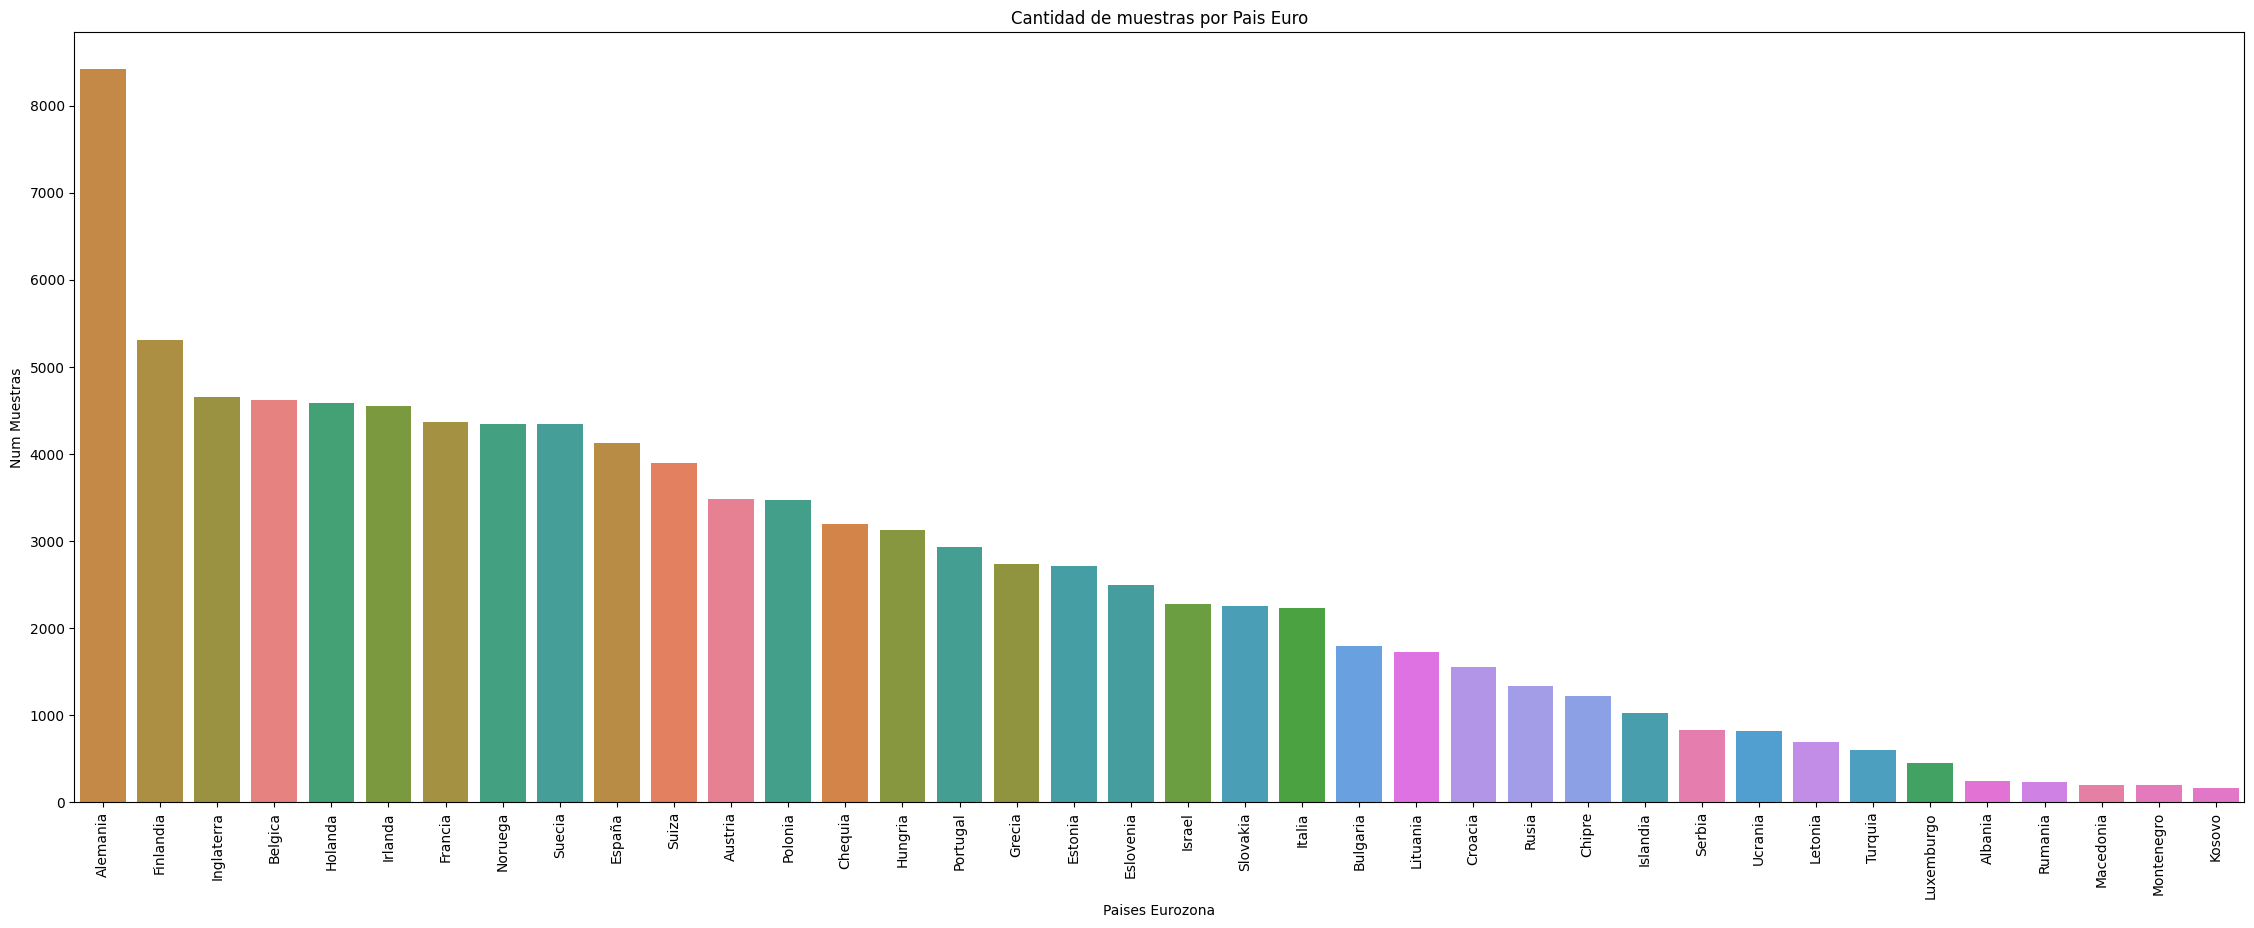

In [48]:
#2)Distribucion del dataset por paises. El dataset dfZES de 100k muestras.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(28, 10)) 
sns.countplot(
    data=dfZES,
    x='cntry',
    hue='cntry', 
    order=dfZES['cntry'].value_counts().index, 
    ax=ax  
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylabel('Num Muestras')
plt.xlabel('Paises Eurozona')
plt.title('Cantidad de muestras por Pais Euro')
plt.show()

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3170613610.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3170613610.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3170613610.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3170613610.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\3170613610.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

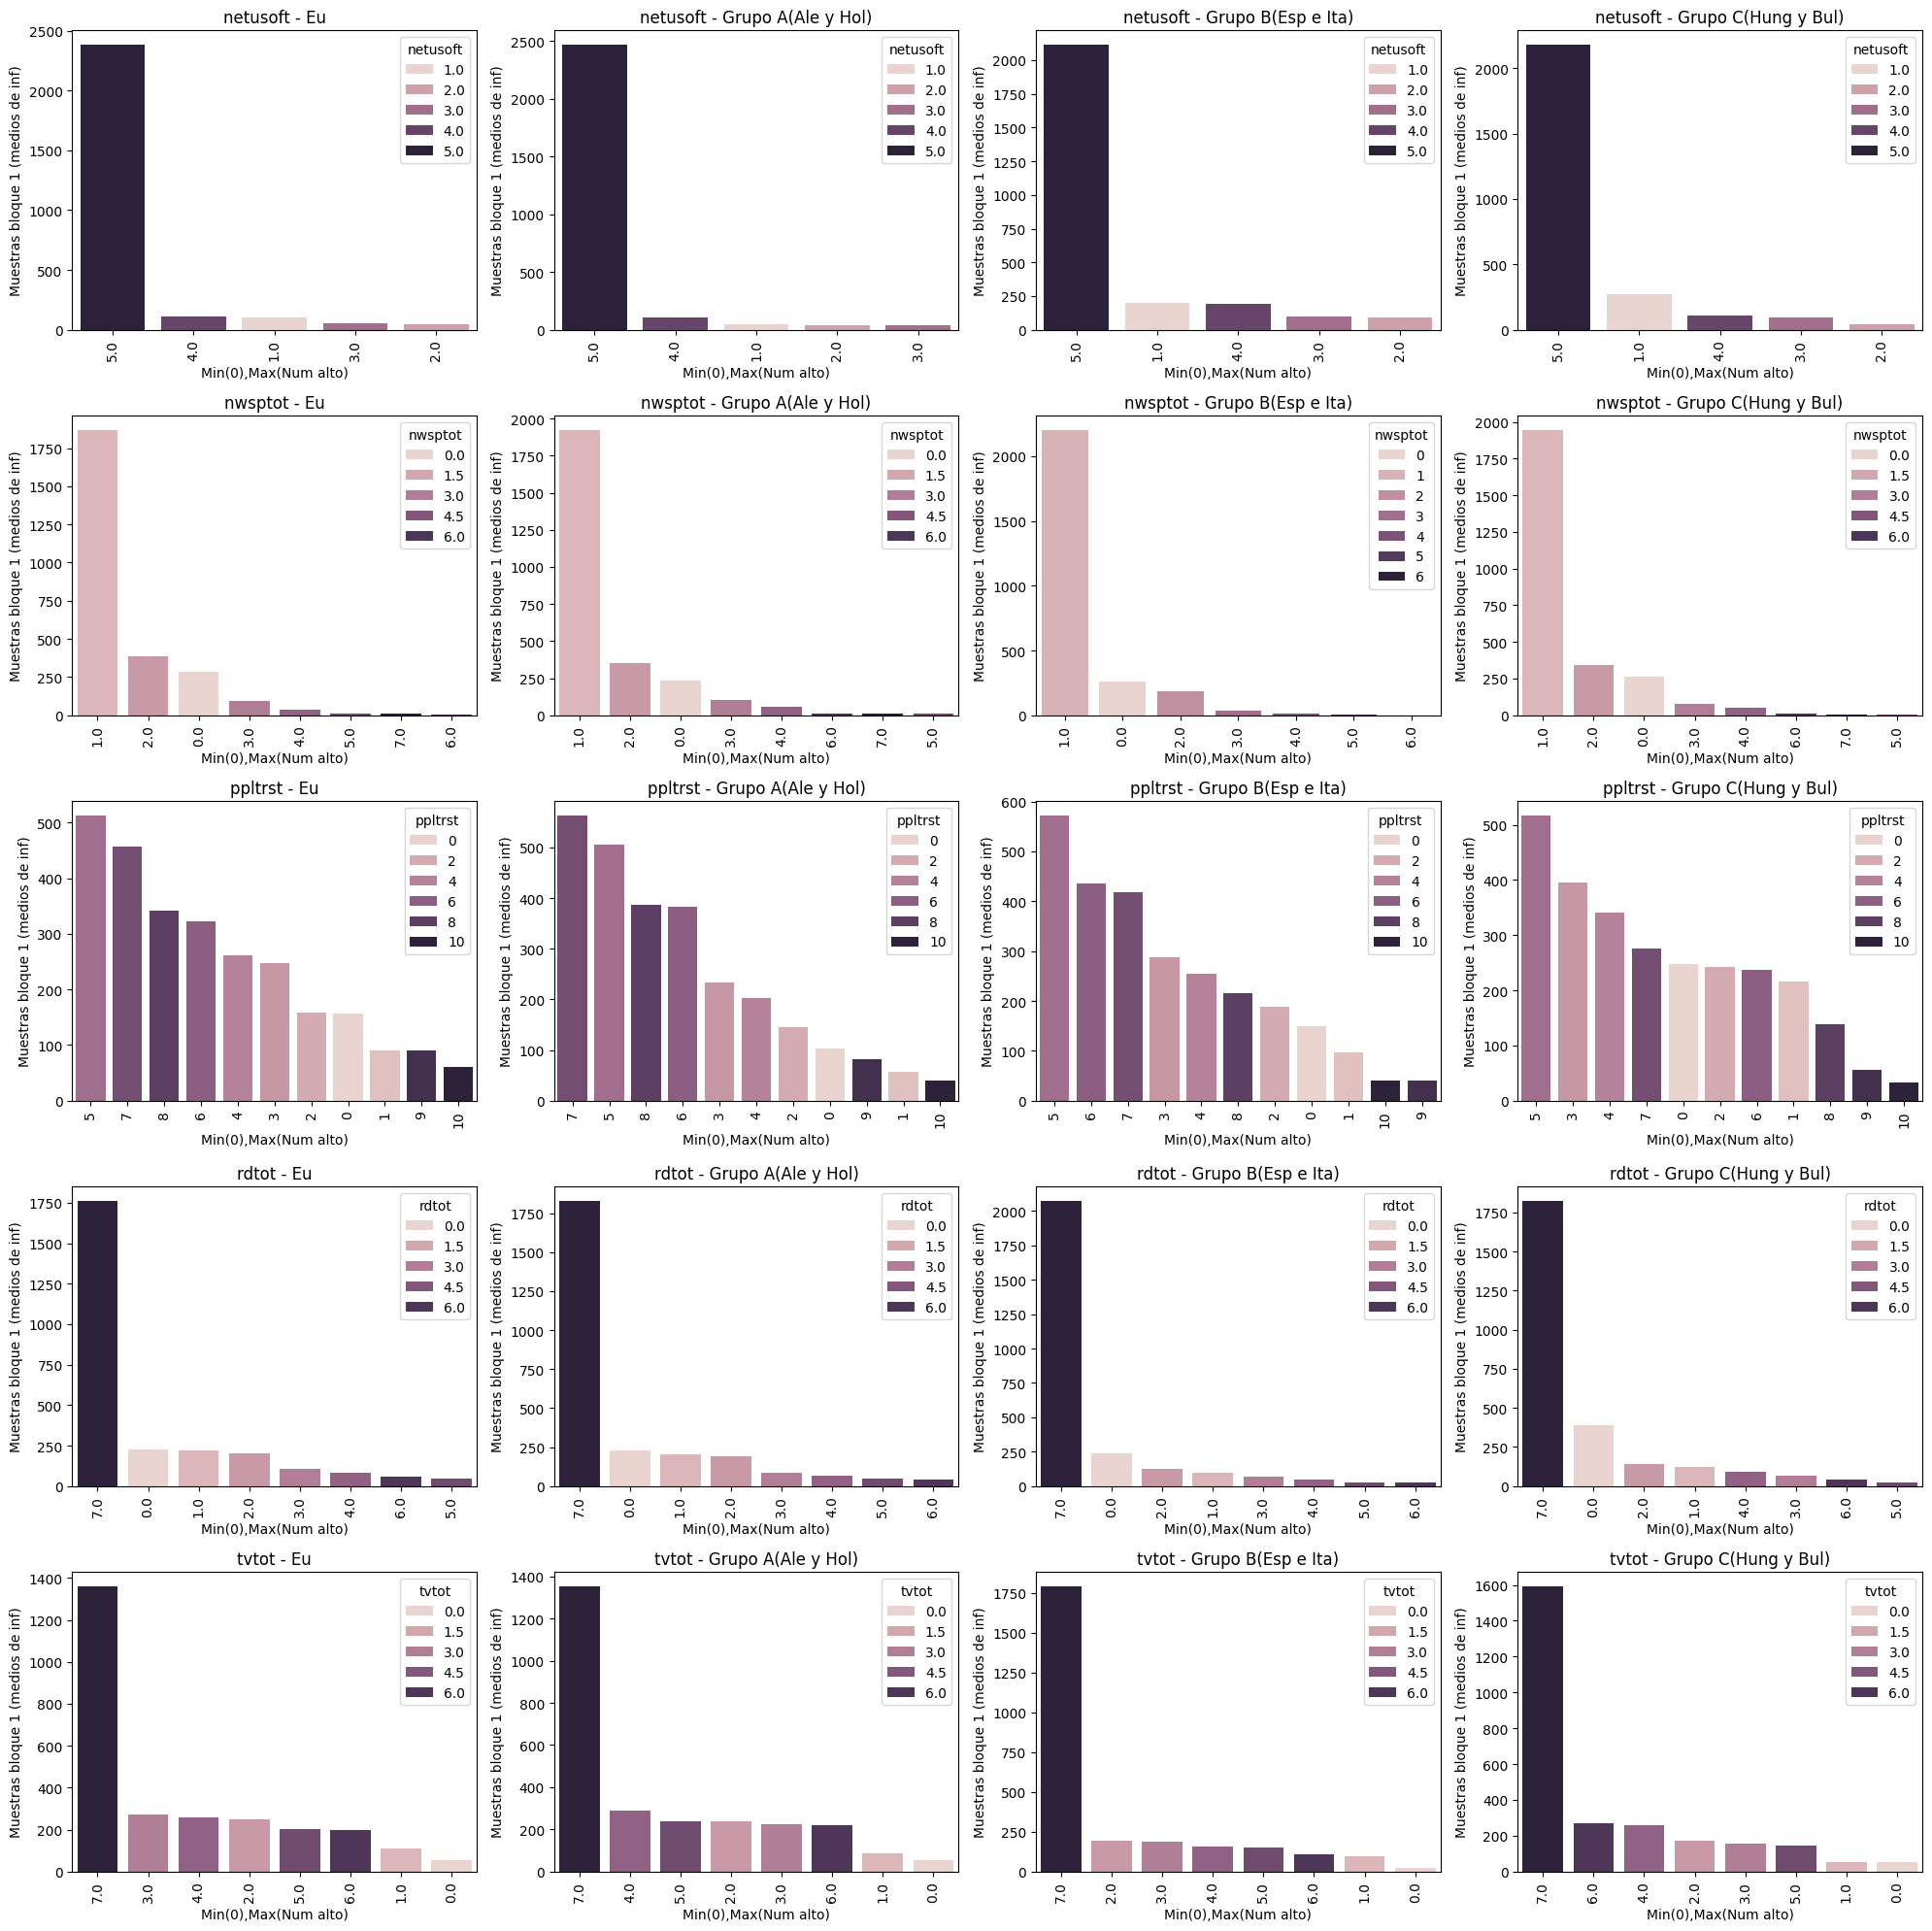

In [ ]:
#2.1) Analisis univariable categoricas factorizadas.
#Univariable numericas
#Aplicamos una funcion para representar las distribuciones de las variables representadas en un grafico de barras.
#2.1.1)Bloque1 (Media Trust) - var target ['ppltrst'] (Grado de confianza en la opinion de la  gente y medios de comunicacion, 0 no confiar nada y 10 plena confianza)
import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 20), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 1 (medios de inf)')
            ax.set_xlabel('Min(Uso Nulo en tiempo),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['netusoft','nwsptot','ppltrst','rdtot','tvtot']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles

Conclusiones Bloque 1, Eu, Grupo A, B, C.:

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\2853419227.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\2853419227.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\2853419227.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\2853419227.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16420\2853419227.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

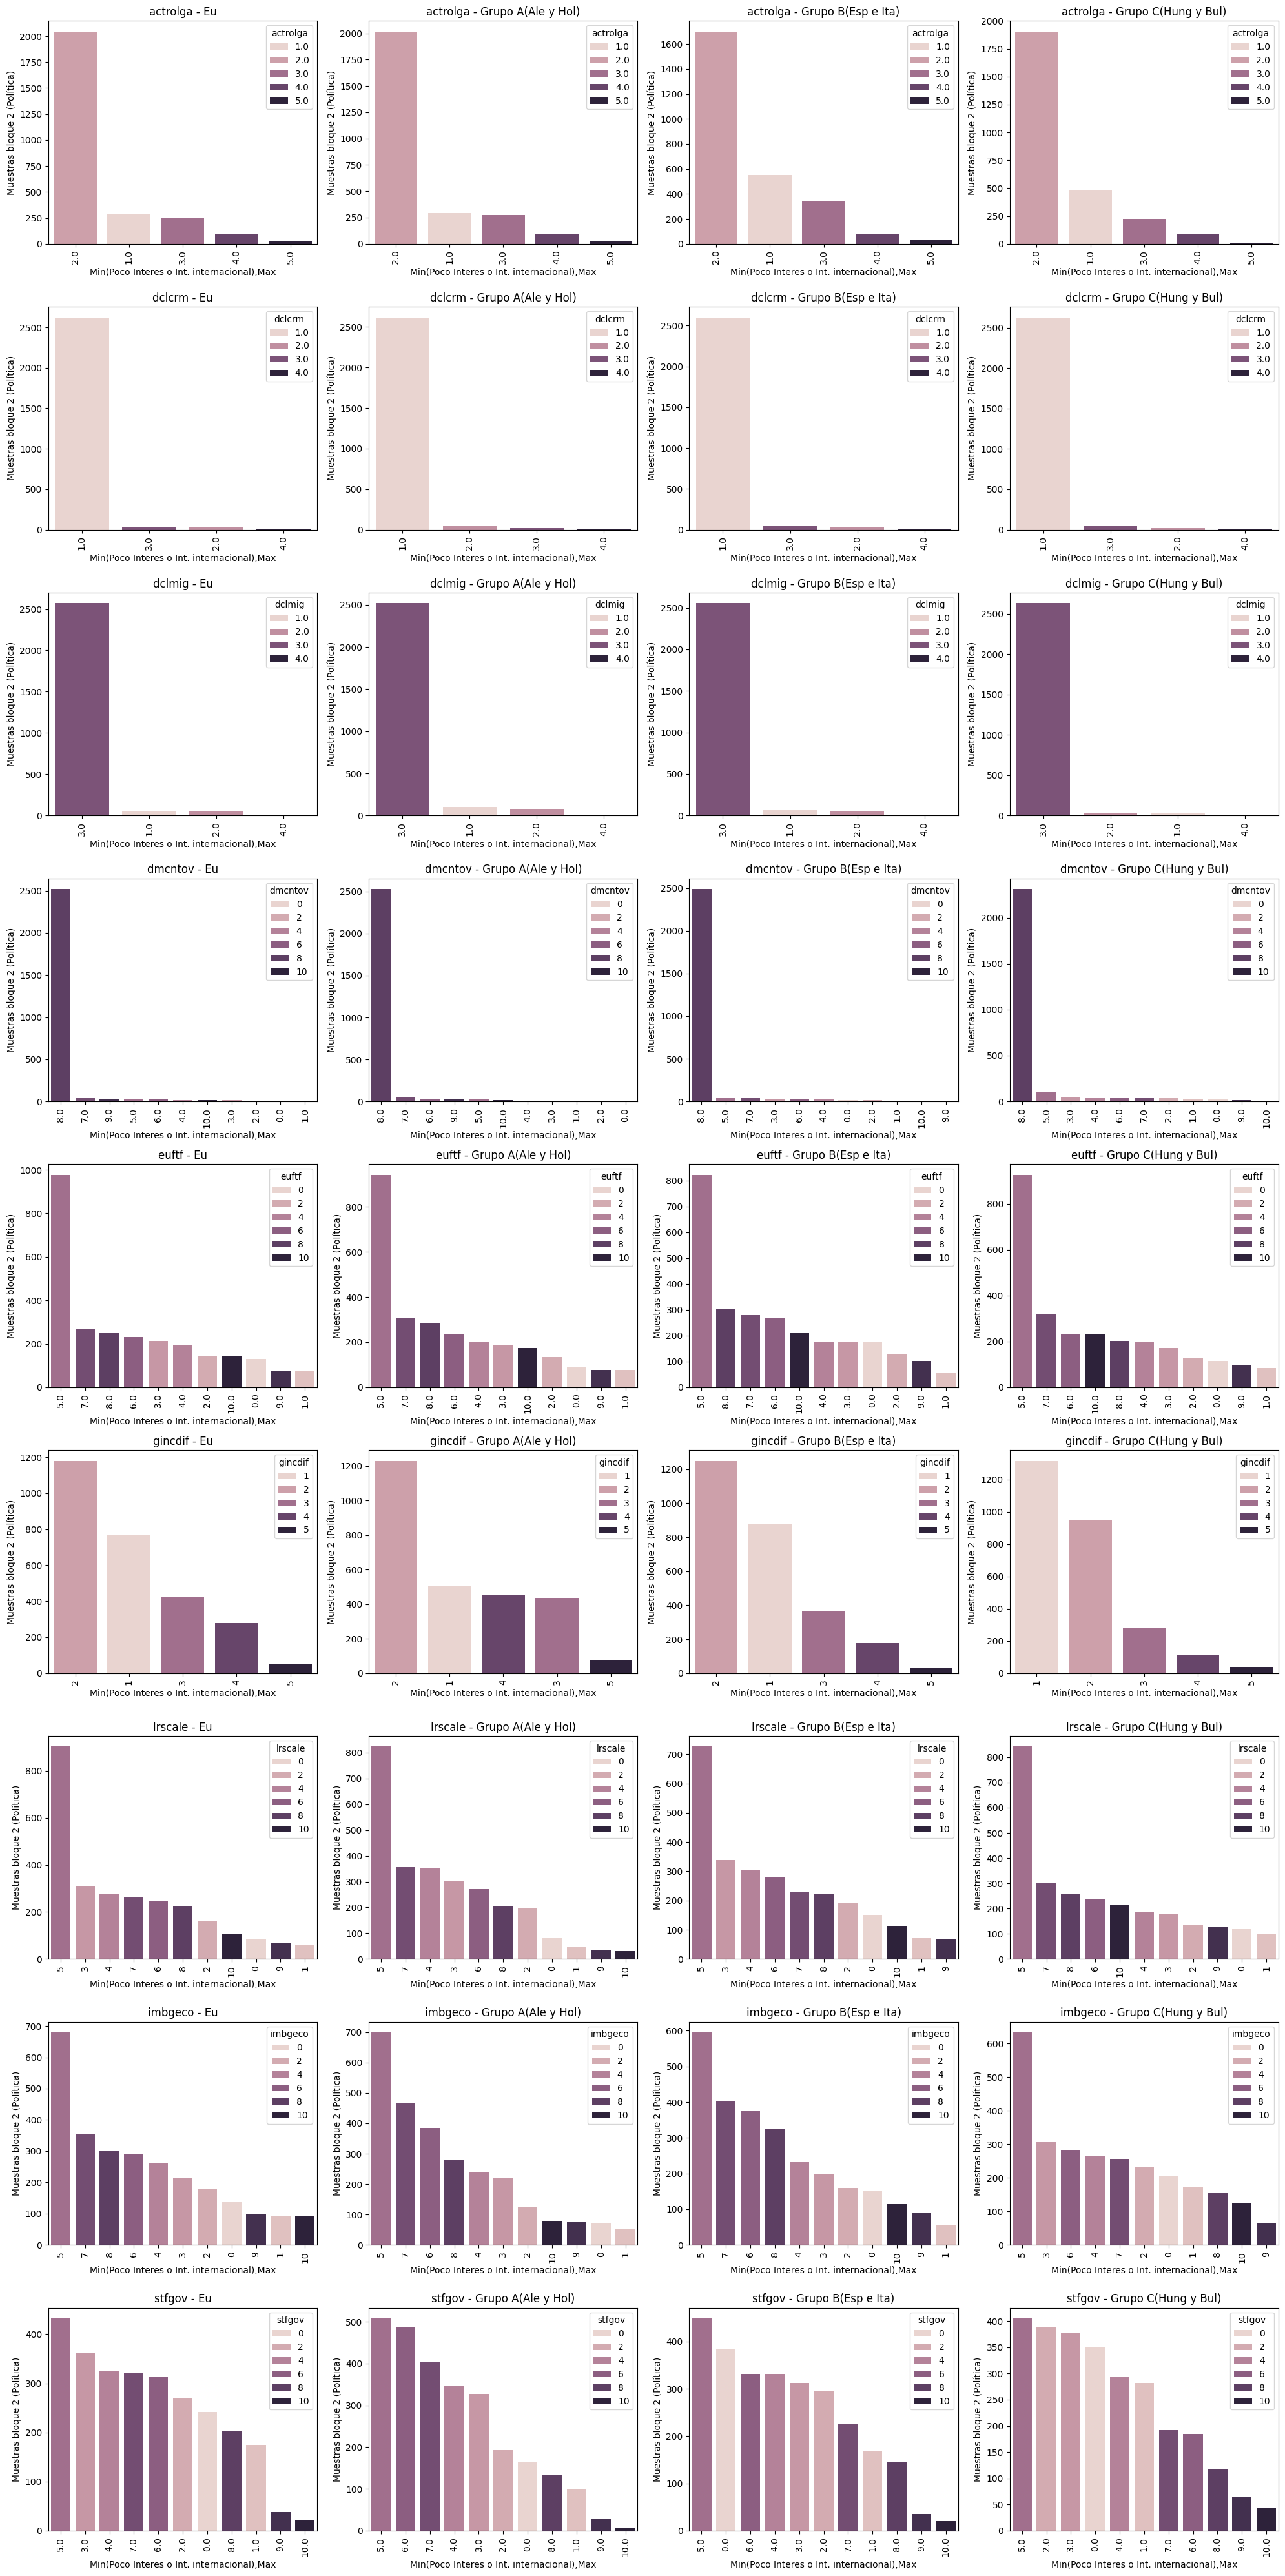

In [64]:
#2.1.1)Bloque2 (Politica) - var target ['ppltrst'] (Grado de confianza en la opinion de la  gente y medios de comunicacion, 0 no confiar nada y 10 plena confianza)
import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 40), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 2 (Política)')
            ax.set_xlabel('Min(Poco Interes o Int. internacional),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','lrscale','imbgeco','stfgov']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles